# BLM19412E - Introduction to Data Mining

Name=Merve<br>
Surname=Çınar<br>
Number=1821221025<br>
Dataset Defination:This dataset has details of users from different backgrounds and whether or not they buy a bike.<br>
https://www.kaggle.com/datasets/heeraldedhia/bike-buyers <br>
Aim of the project:The aim of the project is to infer whether the data in the given data set has taken a bicycle with the help of data mining algorithms after passing through certain stages.

## STEP 0 - Project Proposal

### a) Find your project dataset on Kaggle, UCI etc.

-My dataset is that: https://www.kaggle.com/datasets/heeraldedhia/bike-buyers

##### i. Your dataset contains at least 10 features, 1000 instances
My dataset include 13 features and 1000 instances.
##### ii. Explain your dataset in detail.
In my dataset, it is about whether 1000 users bought a bike according to their different data. There are many features. For example, having a car may be related to buying a bicycle because it may mean that he does not need a bicycle for transportation, or his Region may be associated with this, and some countries are not suitable for cycling because it is very cold and snowy. It is a nice dataset where I can make inferences like this numerically and dependent on algorithms.

1) ID:Sayısal<br>
2) Marital Status: Binary<br>
3) Gender:Binary<br>
4) Income:Sayısal<br>
5) Children:Sayısal<br>
6) Education:Sıralı<br>
7) Occupation:Sıralı<br>
8) Home Owner:Binary<br>
9) Cars:Sayısal<br>
10) Commute Distance:Sayısal<br>
11) Region:Nominal<br>
12) Age:Sayısal<br>
13) Purchased Bike:Binary<br>

### b) Explain, why you have chosen to work on this dataset?
I chose this dataset because there are some NA values injected in the dataset. I can use this dataset for Data Cleaning, Exploration and Visualization.Also, this dataset included lots of type like nominan ordinary binary.In addition, its purpose is to determine whether a bicycle has been bought and its relationship, so it will be more comfortable when applying data mining algorithms.

### c) Do basic pre-processing and exploratory data analysis (EDA) to understand your data.

In [5]:
import pandas as pd
import random as rnd
import numpy as np
import math
import seaborn as sns 

In [6]:
bike_buyers = pd.read_csv("bike_buyers.csv")#read csv file

In [7]:
bike_buyers.head(7) # first 3 object caming to table

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes


In [8]:
bike_buyers.shape #giving how many row and col information

(1000, 13)

In [9]:
bike_buyers.info()# it's giving attributes' type info and how many value is non null info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [10]:
bike_buyers.sample(7)#chosing 7 random obje from my data 

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
290,28319,Single,Female,60000.0,1.0,Partial College,Skilled Manual,No,1.0,0-1 Miles,Pacific,46.0,Yes
612,22983,Single,Female,30000.0,0.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,North America,27.0,No
745,12452,Married,Male,60000.0,4.0,Graduate Degree,Skilled Manual,Yes,0.0,1-2 Miles,North America,47.0,Yes
516,22219,Married,Female,60000.0,2.0,High School,Professional,Yes,2.0,5-10 Miles,North America,49.0,No
518,23586,Married,Female,80000.0,0.0,Bachelors,Management,Yes,1.0,1-2 Miles,North America,34.0,Yes
498,26012,Married,Male,80000.0,1.0,Partial College,Skilled Manual,Yes,1.0,2-5 Miles,North America,48.0,Yes
957,13073,Married,Female,60000.0,0.0,Partial College,Professional,Yes,2.0,5-10 Miles,North America,30.0,No


In [11]:
bike_buyers.columns# here is the attributes' names

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [12]:
bike_buyers.dtypes #dataset type  

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [13]:
bike_buyers.values #Here is the all values inside in array.

array([[12496, 'Married', 'Female', ..., 'Europe', 42.0, 'No'],
       [24107, 'Married', 'Male', ..., 'Europe', 43.0, 'No'],
       [14177, 'Married', 'Male', ..., 'Europe', 60.0, 'No'],
       ...,
       [11809, 'Married', nan, ..., 'North America', 38.0, 'Yes'],
       [19664, 'Single', 'Male', ..., 'North America', 38.0, 'No'],
       [12121, 'Single', 'Male', ..., 'North America', 53.0, 'Yes']],
      dtype=object)

In [14]:
bike_buyers.Region.unique() #for this dataset only Europe, Pacific, North America regions people just bought or didn't buy bike.

array(['Europe', 'Pacific', 'North America'], dtype=object)

In [15]:
bike_buyers.Occupation.unique()

array(['Skilled Manual', 'Clerical', 'Professional', 'Manual',
       'Management'], dtype=object)

In [16]:
bike_buyers.describe() #i can acsess five number summary for int values.In this way, I can learn about a lot of things from here, mean, median quartiles
#, and I can comment when I look at this table, for example, the average age of 1000 users who buy or not bike is 44. 

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [17]:
bike_buyers.isna().sum().sort_values(ascending=False)

Gender              11
Cars                 9
Children             8
Age                  8
Marital Status       7
Income               6
Home Owner           4
ID                   0
Education            0
Occupation           0
Commute Distance     0
Region               0
Purchased Bike       0
dtype: int64

<AxesSubplot:>

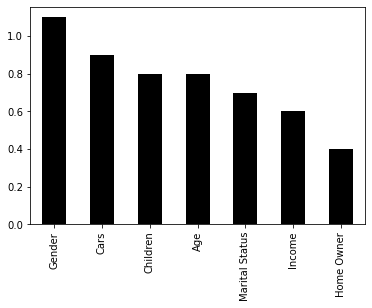

In [18]:
null =bike_buyers.isna().sum().sort_values(ascending = False)/len(bike_buyers)*100

null[null != 0].plot(kind='bar', color='black') #it's graph for showing missing values on my dataset.

In [19]:
print("Mid-range for Income:", ((bike_buyers['Income'].min() + bike_buyers['Income'].max()) / 2)) #Mid-range = (max+min)/2
print("Mid-range for Age:", ((bike_buyers['Age'].min() + bike_buyers['Age'].max()) / 2))
print("Mid-range for Children:", ((bike_buyers['Children'].min() + bike_buyers['Children'].max()) / 2))
print("Mid-range for Cars:", ((bike_buyers['Cars'].min() + bike_buyers['Cars'].max()) / 2))

Mid-range for Income: 90000.0
Mid-range for Age: 57.0
Mid-range for Children: 2.5
Mid-range for Cars: 2.0


In [20]:
print("Max-Min for Age:", bike_buyers['Age'].max() - bike_buyers['Age'].min())
print("Max-Min for Income:", bike_buyers['Income'].max() - bike_buyers['Income'].min())
print("Max-Min for Children:", bike_buyers['Children'].max() - bike_buyers['Children'].min())
print("Max-Min for Cars:", bike_buyers['Cars'].max() - bike_buyers['Cars'].min())

Max-Min for Age: 64.0
Max-Min for Income: 160000.0
Max-Min for Children: 5.0
Max-Min for Cars: 4.0


In [21]:
# IQR=Q3-Q1
age= bike_buyers['Age'].quantile([0.25, 0.5, 0.75])
print(f"IQR for age: {age[0.75] - age[0.25]}")
Income= bike_buyers['Income'].quantile([0.25, 0.5, 0.75])
print(f"IQR for Income: {Income[0.75] - Income[0.25]}")
Children= bike_buyers['Children'].quantile([0.25, 0.5, 0.75])
print(f"IQR for Children: {Children[0.75] - Children[0.25]}")
Cars= bike_buyers['Cars'].quantile([0.25, 0.5, 0.75])
print(f"IQR for Cars: {Cars[0.75] - Cars[0.25]}")

IQR for age: 17.0
IQR for Income: 40000.0
IQR for Children: 3.0
IQR for Cars: 1.0


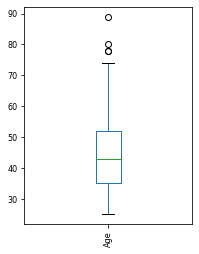

In [22]:
#boxplot = data.boxplot(column=['Income'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
#boxplot2 = data.boxplot(column=['Children'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
#boxplot3 = data.boxplot(column=['Cars'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
boxplot3 = bike_buyers.boxplot(column=['Age'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
# I can put all the boxplot in the same graph but it will be unuseful beacuse Income values araund 6.000 but cars values araund 2
# so that i looked all the graph by one one.

<AxesSubplot:xlabel='Children', ylabel='Cars'>

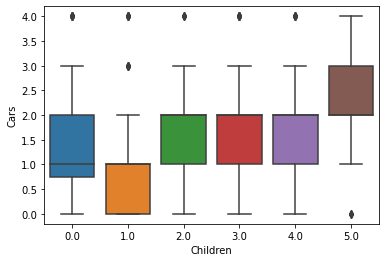

In [23]:

sns.boxplot( x=bike_buyers["Children"], y=bike_buyers["Cars"] ) 

In [24]:
for kolon in bike_buyers.columns[1:]:
    if bike_buyers[kolon].dtype == 'float64':
        print(f"Variance of {kolon} :{bike_buyers[kolon].var()}")

Variance of Income :965209281.8745314
Variance of Children :2.6468366508251537
Variance of Cars :1.2583351170636767
Variance of Age :129.09519546889737


In [25]:

for kolon in bike_buyers.columns[1:]:
    if bike_buyers[kolon].dtype == 'float64':
        print(f"Std of {kolon} : {bike_buyers[kolon].std()}")

Std of Income : 31067.817462360166
Std of Children : 1.6269101545030549
Std of Cars : 1.1217553730932948
Std of Age : 11.362006665589375


<AxesSubplot:ylabel='Frequency'>

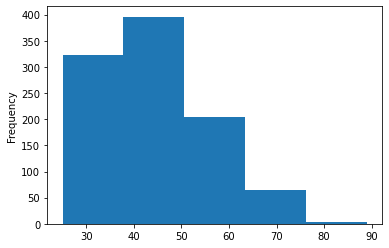

In [26]:
import matplotlib.pyplot as plt
bike_buyers['Age'].plot(kind='hist',bins=5)

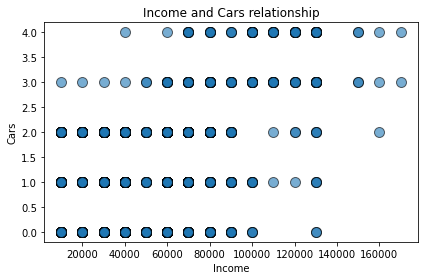

In [27]:
view_count = bike_buyers['Income']
x = bike_buyers['Cars']
plt.scatter(view_count, x, s=100, alpha=0.6, edgecolor='black', linewidth=1)

plt.title('Income and Cars relationship')
plt.xlabel('Income')
plt.ylabel('Cars')

plt.tight_layout()
plt.show()


### d) Briefly explain your aim. Which data mining approaches do you use (at least 2) and why?
I found Classification and Clustering to be two more suitable methods for me, because as a result, there is a distinction as to whether or not to buy a bike, it would be more appropriate for my dataset to classify as in decision trees or to cluster according to other attributes.


## STEP 1 -  Exploratory Data Analysis (EDA)

### a)Explain the shape of the dataset 

my dataset is close to equilibrium but not symmetrical. Since 13 columns are 1000 data, I tested below to show their distribution.


In [28]:
bike_buyers.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [29]:
len(bike_buyers)

1000

In [30]:
bike_buyers.shape#in my dataset have  1000 object and 13 attributes

(1000, 13)

In [31]:
bike_buyers.corr()#i am looking the corelation between my columns.The higest corelation between age and children.

,ID,Income,Children,Cars,Age
ID,1.000000,-0.075081,-0.028747,0.022125,-0.054238
Income,-0.075081,1.000000,0.261053,0.439980,0.170845
Children,-0.028747,0.261053,1.000000,0.280243,0.531668
Cars,0.022125,0.439980,0.280243,1.000000,0.186398
Age,-0.054238,0.170845,0.531668,0.186398,1.000000


In [32]:
bike_buyers.cov()

,ID,Income,Children,Cars,Age
ID,2.859398e+07,-1.247721e+07,-249.737306,132.255296,-3300.871163
Income,-1.247721e+07,9.652093e+08,13173.186026,15261.204655,60499.629052
Children,-2.497373e+02,1.317319e+04,2.646837,0.509242,9.791588
Cars,1.322553e+02,1.526120e+04,0.509242,1.258335,2.368879
Age,-3.300871e+03,6.049963e+04,9.791588,2.368879,129.095195


<AxesSubplot:xlabel='Age', ylabel='Count'>

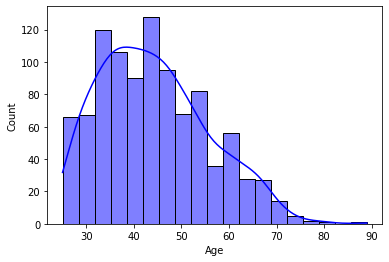

In [33]:
sns.histplot(bike_buyers, x='Age', kde=True, color="b")
#Also i can draw all numeric columns graph like this and i can commend their shape of disrubition in here right skewed

### b) Explain the features types in the dataset. Explain in detail if there are any problems? 
In the code below, I filter the numeric and categorical properties and specify the types of the properties. There is a problem for the features. Although it is a numeric binary, yes or no string data is entered, so it may cause difficulties in algorithms. I will change it to 0 and 1 in the next stages.

In [34]:
bike_buyers.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [35]:
bike_buyers.values

array([[12496, 'Married', 'Female', ..., 'Europe', 42.0, 'No'],
       [24107, 'Married', 'Male', ..., 'Europe', 43.0, 'No'],
       [14177, 'Married', 'Male', ..., 'Europe', 60.0, 'No'],
       ...,
       [11809, 'Married', nan, ..., 'North America', 38.0, 'Yes'],
       [19664, 'Single', 'Male', ..., 'North America', 38.0, 'No'],
       [12121, 'Single', 'Male', ..., 'North America', 53.0, 'Yes']],
      dtype=object)

In [36]:
bike_buyers.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [37]:
categoric=[x for x in bike_buyers.columns if bike_buyers[x].dtypes=='object'] 
categoric

['Marital Status',
 'Gender',
 'Education',
 'Occupation',
 'Home Owner',
 'Commute Distance',
 'Region',
 'Purchased Bike']

In [38]:
numeric=[y for y in bike_buyers.columns if bike_buyers[y].dtypes!='object']
numeric

['ID', 'Income', 'Children', 'Cars', 'Age']

### c) Explain the distribution of some important features in your dataset using visualizations. 

<AxesSubplot:ylabel='Frequency'>

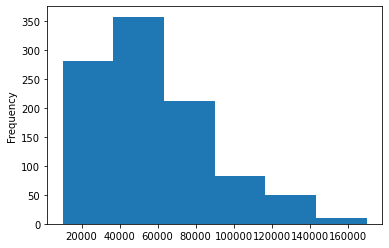

In [39]:
import matplotlib.pyplot as plt
bike_buyers['Income'].plot(kind='hist',bins=6)
# when i look at this table it's right skewed.

<AxesSubplot:ylabel='Marital Status'>

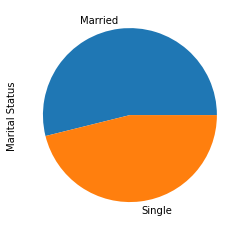

In [40]:
bike_buyers['Marital Status'].value_counts().plot.pie()# in my dataset users are mostly Mariied

<AxesSubplot:ylabel='Gender'>

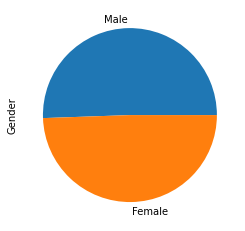

In [41]:
bike_buyers['Gender'].value_counts().plot.pie()
#When i look at the graph there are it's seems %50 male %50 female but i will check the exact count 

In [42]:
len(bike_buyers[bike_buyers['Gender']=='Female'])

489

In [43]:
len(bike_buyers[bike_buyers['Gender']=='Male'])# the male and female count is so close .

500

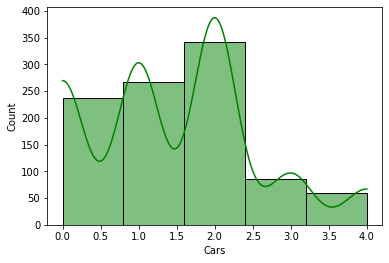

In [44]:
sns.histplot(bike_buyers, x='Cars',bins=5, kde=True, color="g") 
t=bike_buyers['Cars'].mean()
l=bike_buyers['Cars'].mode()
#l>t so that mode bigger than mean.left skewed but this graph close de symetic.

<AxesSubplot:xlabel='Children', ylabel='Count'>

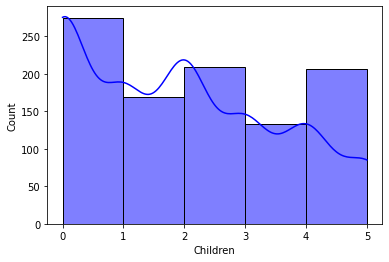

In [45]:
sns.histplot(bike_buyers, x='Children',bins=5, kde=True, color="b")


<AxesSubplot:xlabel='Income', ylabel='Count'>

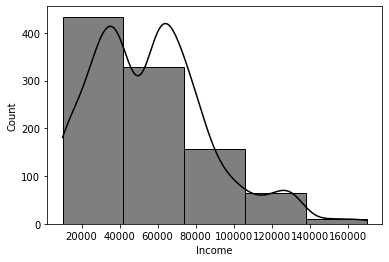

In [46]:
sns.histplot(bike_buyers, x='Income',bins=5, kde=True, color="k") #right skewd

<AxesSubplot:xlabel='Cars', ylabel='Children'>

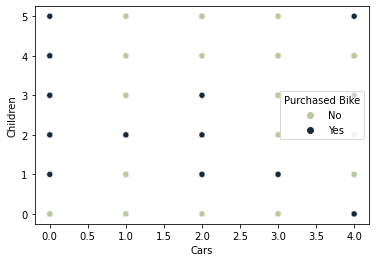

In [47]:
island=list(bike_buyers.groupby('Income'))

sns.scatterplot(data=bike_buyers, x = 'Cars', y = 'Children', hue='Purchased Bike', palette="ch:r=-.6,l=.75")

#it's suprising but there is no corelation between them.

<AxesSubplot:xlabel='Income', ylabel='Count'>

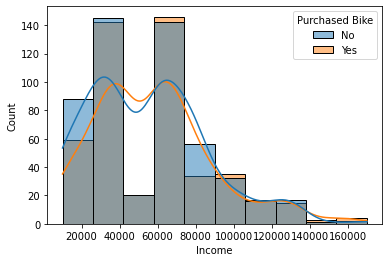

In [48]:
sns.histplot(data=bike_buyers, x='Income', hue='Purchased Bike',bins=10, kde=True, color="m")

<AxesSubplot:xlabel='Purchased Bike', ylabel='Cars'>

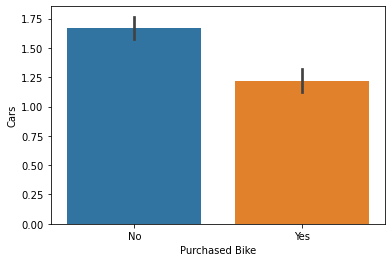

In [49]:
sns.barplot(data=bike_buyers, x='Purchased Bike', y='Cars')

<AxesSubplot:xlabel='Cars', ylabel='count'>

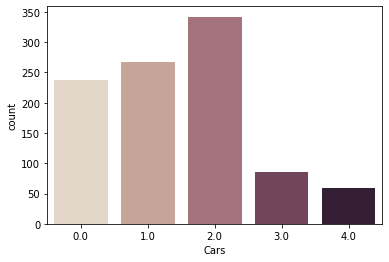

In [50]:
sns.countplot(data=bike_buyers,x='Cars', palette="ch:.25")

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

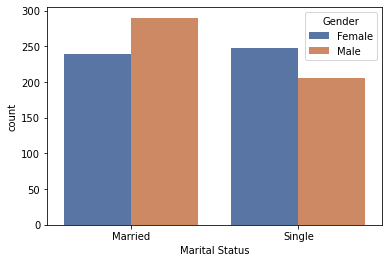

In [51]:
sns.countplot(data=bike_buyers,x='Marital Status', hue='Gender', palette='deep')

<AxesSubplot:xlabel='Purchased Bike', ylabel='count'>

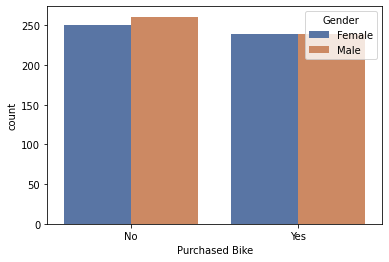

In [52]:

sns.countplot(data=bike_buyers,x='Purchased Bike', hue='Gender', palette='deep')

<AxesSubplot:xlabel='Marital Status', ylabel='Income'>

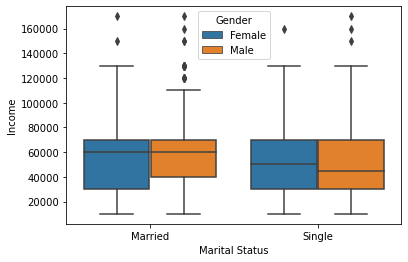

In [53]:
sns.boxplot(data=bike_buyers, x='Marital Status', y='Income', hue='Gender') # when i look at the boxplot i see lots of ouitler.

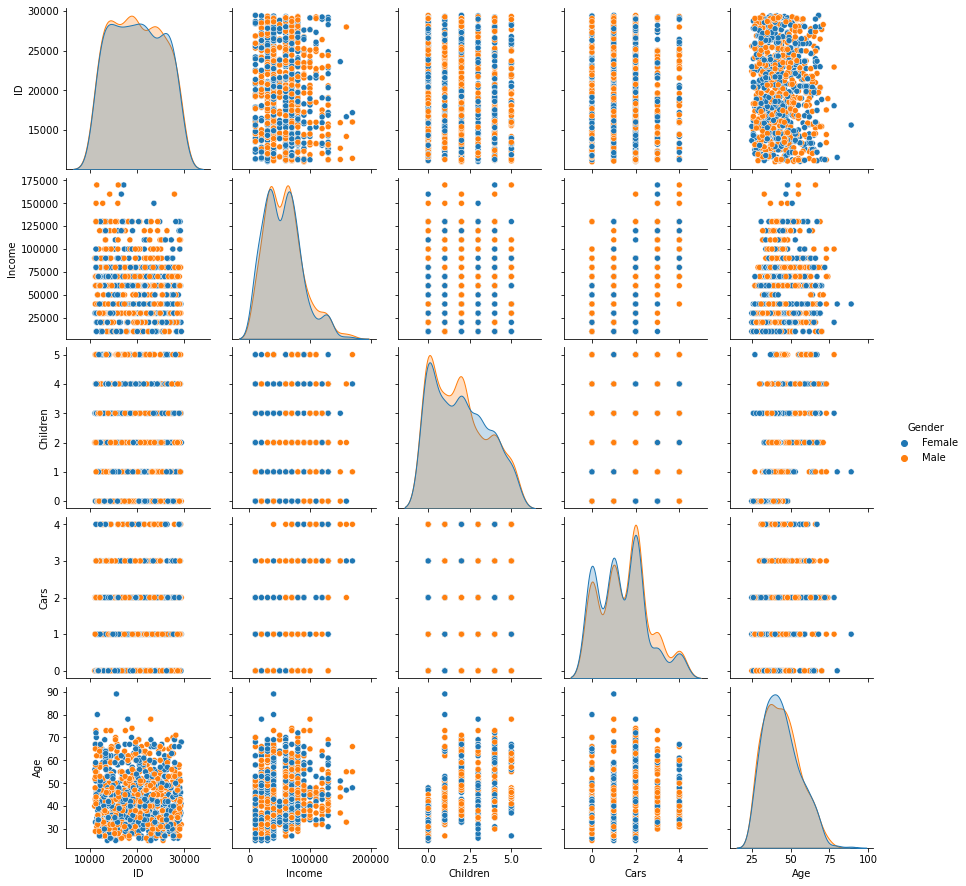

In [54]:
sns.pairplot(data=bike_buyers, hue='Gender')# this matrix is so importent because you can see all the relation. my main aim is that
# making prediction to buy bike or not so there is no corellation between all columns.

## STEP 2 -  Preprocessing & Feature Engineering

### a) Preprocessing

#### i) Check whether there are any outliers? Remove outliers (if there are any) in your data

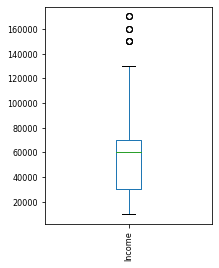

In [55]:
boxplot = bike_buyers.boxplot(column=['Income'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
#there are 3 outliers at Income

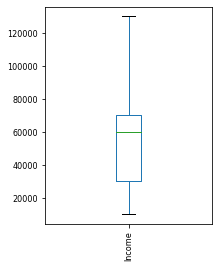

In [56]:
income= bike_buyers['Income'].quantile([0.25, 0.5, 0.75])
a=income[0.75]+(1.5*(income[0.75] - income[0.25]))
new_data_copy = bike_buyers.copy()
new_data_copy['Income'] = np.where(
    new_data_copy['Income'] > a,
    a,
        new_data_copy['Income']
    )
boxplot = new_data_copy.boxplot(column=['Income'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
# in here , i crate a new database which name is new_data_copy .Cause of i don't want to change my main data to compare with new data.
#Also, i remove the 3 outliers from Income.and i check again, all outliers are removed

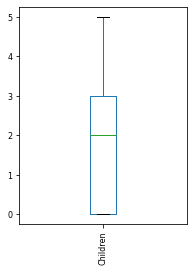

In [57]:
boxplot2 = bike_buyers.boxplot(column=['Children'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
#There is no outliers in here

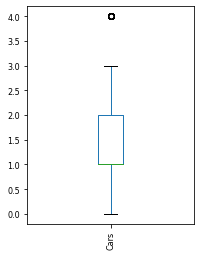

In [58]:
boxplot3 = bike_buyers.boxplot(column=['Cars'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
#one outlier

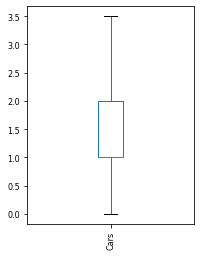

In [59]:
cars= bike_buyers['Cars'].quantile([0.25, 0.5, 0.75])
b=cars[0.75]+(1.5*(cars[0.75] - cars[0.25]))
new_data_copy['Cars'] = np.where(
    new_data_copy['Cars'] > b,
    b,
        new_data_copy['Cars']
    )
boxplot = new_data_copy.boxplot(column=['Cars'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
#i removed from new data.and i check again, all outliers are removed

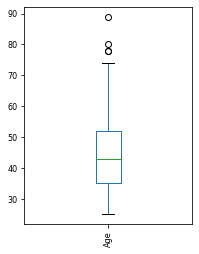

In [60]:
boxplot4 = bike_buyers.boxplot(column=['Age'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
#3 outliers

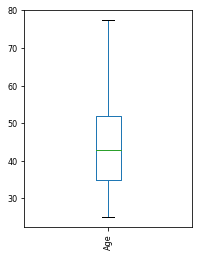

In [61]:
age= bike_buyers['Age'].quantile([0.25, 0.5, 0.75])
c=age[0.75]+(1.5*(age[0.75] - age[0.25]))
new_data_copy = bike_buyers.copy()
new_data_copy['Age'] = np.where(
    new_data_copy['Age'] > c,
    c,
        new_data_copy['Age']
    )
boxplot = new_data_copy.boxplot(column=['Age'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
 #i removed from new data and i check again, all outliers are removed

#### ii) How many columns include missing values?
Gender              11
Cars                 9
Children             8
Age                  8
Marital Status       7
Income               6
Home Owner           4                     

7 columns include missing values

In [62]:
new_data_copy.isnull()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,True,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
print("Count of missing values:")
print(new_data_copy.isnull().sum())

Count of missing values:
ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64


In [64]:
new_data_copy.isna().sum().sort_values(ascending=False)
#This code order the missing values. When i looking in here i can say missing values are not much for 1000 user.

Gender              11
Cars                 9
Children             8
Age                  8
Marital Status       7
Income               6
Home Owner           4
ID                   0
Education            0
Occupation           0
Commute Distance     0
Region               0
Purchased Bike       0
dtype: int64

<AxesSubplot:>

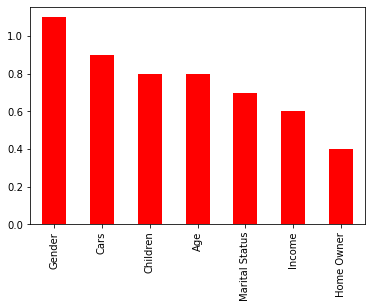

In [65]:
miss =new_data_copy.isna().sum().sort_values(ascending = False)/len(new_data_copy)*100
miss[miss != 0].plot(kind='bar', color='red')
#graph of missing values the missing values are less but all the missing values are in the important features, so i have to handle 
#missing values with the best way.

#### iii) Explain your method to handle each of those missing values.
There are many types of catching null values. In my dataset Gender, Cars ,Children,age,Marital Status,Income ,Home Owner These properties contain blank data. I used the most recurring value for Gender and Home Owner, namely mode, instead of blank data. In cars, I found it correct to fill in the blanks in age at child with the median because the median made sense to me since the mean is not an integer and a person cannot have 1.4 cars. Income doesn't have to be an integer so I filled it with mean

In [66]:
new_data_copy.head(4) #3. value^s gender is NaN

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes


In [67]:
aa = new_data_copy['Gender'].mode()

if(str(aa)=='0    Male\ndtype: object'):
    new_data_copy['Gender']=new_data_copy['Gender'].fillna('Male')
else:
     new_data_copy['Gender']=new_data_copy['Gender'].fillna('Female')
# in here i am fill the missing values from Gender with the mode. When i looking the mode the most repeating value is Male so that
# i am filling missing Gender values with Male.

In [68]:
new_data_copy.head(4)# 3. value's gender became a male.

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes


In [69]:
empcar = new_data_copy[new_data_copy['Cars'].isnull()]
empcar# i checked the missing values from Cars

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No
196,16209,Single,Female,50000.0,0.0,Graduate Degree,Skilled Manual,Yes,NaN,1-2 Miles,Europe,36.0,No
202,18626,Single,Male,40000.0,2.0,Partial College,Clerical,Yes,NaN,1-2 Miles,Europe,33.0,Yes
351,13572,Single,Male,10000.0,3.0,High School,Manual,Yes,NaN,0-1 Miles,Europe,37.0,Yes
448,11383,Married,Female,30000.0,3.0,Graduate Degree,Clerical,Yes,NaN,0-1 Miles,Europe,46.0,No
511,12207,Single,Male,80000.0,4.0,Bachelors,Management,Yes,NaN,5-10 Miles,North America,66.0,Yes
561,27218,Married,Female,20000.0,2.0,Partial High School,Clerical,No,NaN,0-1 Miles,North America,48.0,No
615,11538,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,No,NaN,0-1 Miles,North America,47.0,Yes
933,11941,Single,Male,60000.0,0.0,Partial College,Skilled Manual,Yes,NaN,5-10 Miles,North America,29.0,No


In [70]:
median = new_data_copy['Cars'].median()
mean = new_data_copy['Cars'].mean()
new_data_copy['Cars']=new_data_copy['Cars'].fillna(median)
mean

# i am handle with median because. Every person Can have an intiger number of car they not have 1,451 number of car 
#so i fill the missing car values with median.

1.455095862764884

In [71]:
new_data_copy.loc[12]#12.object missing value at car fill with median.

ID                            11434
Marital Status              Married
Gender                         Male
Income                     170000.0
Children                        5.0
Education           Partial College
Occupation             Professional
Home Owner                      Yes
Cars                            1.0
Commute Distance          0-1 Miles
Region                       Europe
Age                            55.0
Purchased Bike                   No
Name: 12, dtype: object

In [72]:
empchild = new_data_copy[new_data_copy['Children'].isnull()]
empchild

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
117,24065,Single,Female,20000.0,NaN,High School,Manual,Yes,0.0,0-1 Miles,Europe,40.0,Yes
217,13673,Single,Female,20000.0,NaN,Partial High School,Manual,No,2.0,0-1 Miles,Europe,25.0,No
386,28957,Single,Female,120000.0,NaN,Partial High School,Professional,Yes,4.0,10+ Miles,Pacific,34.0,Yes
549,13453,Married,Female,130000.0,NaN,Bachelors,Management,Yes,3.0,0-1 Miles,North America,45.0,Yes
638,18949,Single,Male,70000.0,NaN,Graduate Degree,Management,Yes,2.0,5-10 Miles,North America,74.0,Yes
688,11699,Single,Male,60000.0,NaN,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,NaN,No
805,26778,Single,Female,40000.0,NaN,High School,Skilled Manual,Yes,2.0,5-10 Miles,North America,31.0,No
960,23491,Single,Male,100000.0,NaN,Partial College,Professional,No,4.0,1-2 Miles,North America,45.0,No


In [73]:
median = new_data_copy['Children'].median()
new_data_copy['Children']=new_data_copy['Children'].fillna(median)
# i am filling missing values with the median because number of childeren shoul be int 

In [74]:
new_data_copy.loc[117]
#i am checking.

ID                        24065
Marital Status           Single
Gender                   Female
Income                  20000.0
Children                    2.0
Education           High School
Occupation               Manual
Home Owner                  Yes
Cars                        0.0
Commute Distance      0-1 Miles
Region                   Europe
Age                        40.0
Purchased Bike              Yes
Name: 117, dtype: object

In [75]:
median = new_data_copy['Age'].median()
new_data_copy['Age']=new_data_copy['Age'].fillna(median)
#i fill missing age values with median 
median

43.0

In [76]:
empcar = new_data_copy[new_data_copy['Income'].isnull()]
empcar


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,43.0,Yes
110,21006,Single,Female,NaN,1.0,Partial College,Manual,No,0.0,0-1 Miles,Europe,46.0,Yes
191,26944,Single,Male,NaN,2.0,High School,Manual,Yes,0.0,0-1 Miles,Europe,36.0,Yes
301,17926,NaN,Female,NaN,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes
441,11061,Married,Male,NaN,2.0,Partial College,Skilled Manual,Yes,2.0,5-10 Miles,Pacific,52.0,Yes
509,24357,Married,Male,NaN,3.0,Bachelors,Professional,Yes,1.0,2-5 Miles,North America,48.0,Yes


In [77]:
mean = new_data_copy['Income'].mean()
new_data_copy['Income']=new_data_copy['Income'].fillna(mean)
#it can be fill with mean cause income not have to be int vale

In [78]:
new_data_copy.loc[9]

ID                            19280
Marital Status              Married
Gender                         Male
Income                 56267.605634
Children                        2.0
Education           Partial College
Occupation                   Manual
Home Owner                      Yes
Cars                            1.0
Commute Distance          0-1 Miles
Region                       Europe
Age                            43.0
Purchased Bike                  Yes
Name: 9, dtype: object

In [79]:
new_data_copy['Income'].mean
# i am checking

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       40000.0
1       30000.0
2       80000.0
3       70000.0
4       30000.0
         ...   
995     60000.0
996     70000.0
997     60000.0
998    100000.0
999     60000.0
Name: Income, Length: 1000, dtype: float64>

In [80]:
empMarital = new_data_copy[new_data_copy['Marital Status'].isnull()]
empMarital

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
8,22155,NaN,Male,20000.000000,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
27,18283,NaN,Female,100000.000000,0.0,Bachelors,Professional,No,1.0,5-10 Miles,Pacific,40.0,No
49,14939,NaN,Male,40000.000000,0.0,Bachelors,Clerical,Yes,0.0,0-1 Miles,Europe,39.0,Yes
98,19441,NaN,Male,40000.000000,0.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,43.0,Yes
150,26154,NaN,Male,60000.000000,1.0,Partial College,Skilled Manual,Yes,1.0,5-10 Miles,Pacific,43.0,Yes
234,24611,NaN,Male,90000.000000,0.0,Bachelors,Professional,No,4.0,10+ Miles,Pacific,35.0,Yes
301,17926,NaN,Female,56267.605634,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes


In [81]:
new_data_copy.rename(columns = {'Marital Status' : 'Marital_Status', 'Home Owner' : 'Home_Owner','Purchased Bike':'Purchased_Bike','Commute Distance':'Commute_Distance'}, inplace = True)

In [82]:
new_data_copy.Marital_Status.unique()

array(['Married', 'Single', nan], dtype=object)

In [83]:
new_data_copy.Marital_Status.mode()
# i am checking what is the marital status is the most.And i saw in my dataset there are mostly married people.

0    Married
dtype: object

In [84]:
new_data_copy['Marital_Status']=new_data_copy['Marital_Status'].fillna('Married')#i fill the missing values with married.

In [85]:
new_data_copy.loc[27]#i am checking.

ID                         18283
Marital_Status           Married
Gender                    Female
Income                  100000.0
Children                     0.0
Education              Bachelors
Occupation          Professional
Home_Owner                    No
Cars                         1.0
Commute_Distance      5-10 Miles
Region                   Pacific
Age                         40.0
Purchased_Bike                No
Name: 27, dtype: object

In [86]:
new_data_copy.Home_Owner.mode()

0    Yes
dtype: object

In [87]:
new_data_copy['Home_Owner']=new_data_copy['Home_Owner'].fillna('Yes')

In [88]:
new_data_copy.isna().sum().sort_values(ascending=False)#i am checking is there any missing value.

ID                  0
Marital_Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home_Owner          0
Cars                0
Commute_Distance    0
Region              0
Age                 0
Purchased_Bike      0
dtype: int64

#### iv) Explain if you need to apply any kind of transformations and/or encoding.
The space character can cause errors in some encodings. First of all, I renamed the features with space characters. At the same time, I changed the binary data to yes no and 0 1 instead of male female. And finally I cast properties like car child age from float to int

In [89]:
filtered = (line for line in new_data_copy['Age'] if  line<0)
for line in filtered:
    print(new_data_copy)
    #i am checking is there any negative value for age , cars, children , income. but there is no negative value

In [90]:
#i made this transform before but i put here to explain. when there is a space in the name some code is not working (like asnew_data_copy.Home Owner.mode())so that i made this transform.
new_data_copy.rename(columns = {'Marital Status' : 'Marital_Status', 'Home Owner' : 'Home_Owner','Purchased Bike':'Purchased_Bike','Commute Distance':'Commute_Distance'}, inplace = True)

In [91]:
categoric=[a for a in new_data_copy.columns if new_data_copy[a].dtypes=='object'] 
categoric # i cannot transform all of this to numeric.

['Marital_Status',
 'Gender',
 'Education',
 'Occupation',
 'Home_Owner',
 'Commute_Distance',
 'Region',
 'Purchased_Bike']

In [92]:
numeric=[a for a in new_data_copy.columns if new_data_copy[a].dtypes!='object']
numeric

['ID', 'Income', 'Children', 'Cars', 'Age']

In [93]:
new_data_copy.Education.unique
#i check how many selention it have.

<bound method Series.unique of 0            Bachelors
1      Partial College
2      Partial College
3            Bachelors
4            Bachelors
            ...       
995        High School
996    Graduate Degree
997          Bachelors
998          Bachelors
999        High School
Name: Education, Length: 1000, dtype: object>

In [94]:
new_data_copy['Gender'] = np.where(new_data_copy['Gender'] == 'Female', 1, 0) 
#i can transform gender yes to 1 no to 0 it's more useful for for data mining.

In [95]:
new_data_copy['Purchased_Bike'] = np.where(new_data_copy['Purchased_Bike'] == 'Yes', 1, 0) 
#i can transform Purchased_Bike yes to 1 no to 0 it's more useful for for data mining.

In [96]:
new_data_copy['Home_Owner'] = np.where(new_data_copy['Home_Owner'] == 'Yes', 1, 0) 
#i can transform Purchased_Bike yes to 1 no to 0 it's more useful for for data mining.

In [97]:
new_data_copy.Occupation.unique# it cannot be transform  1, 0 cause there is more selection from 2 

<bound method Series.unique of 0      Skilled Manual
1            Clerical
2        Professional
3        Professional
4            Clerical
            ...      
995      Professional
996      Professional
997    Skilled Manual
998        Management
999      Professional
Name: Occupation, Length: 1000, dtype: object>

In [98]:
new_data_copy.Region.unique# it cannot be transform  1, 0 cause there is more selection from 2 

<bound method Series.unique of 0             Europe
1             Europe
2             Europe
3            Pacific
4             Europe
           ...      
995    North America
996    North America
997    North America
998    North America
999    North America
Name: Region, Length: 1000, dtype: object>

In [99]:
new_data_copy.Commute_Distance.unique# it cannot be transform  1, 0 cause there is more selection from 2 

<bound method Series.unique of 0       0-1 Miles
1       0-1 Miles
2       2-5 Miles
3      5-10 Miles
4       0-1 Miles
          ...    
995     2-5 Miles
996     2-5 Miles
997     0-1 Miles
998     1-2 Miles
999     10+ Miles
Name: Commute_Distance, Length: 1000, dtype: object>

In [100]:
display(new_data_copy.dtypes)

ID                    int64
Marital_Status       object
Gender                int32
Income              float64
Children            float64
Education            object
Occupation           object
Home_Owner            int32
Cars                float64
Commute_Distance     object
Region               object
Age                 float64
Purchased_Bike        int32
dtype: object

In [101]:

# i am converting cars, age, children type float to int because all of them int.it's more make sense.
new_data_copy['Cars'] = new_data_copy['Cars'].astype(int)
new_data_copy['Age'] = new_data_copy['Age'].astype(int)
new_data_copy['Children'] = new_data_copy['Children'].astype(int)

display(new_data_copy.dtypes)

ID                    int64
Marital_Status       object
Gender                int32
Income              float64
Children              int32
Education            object
Occupation           object
Home_Owner            int32
Cars                  int32
Commute_Distance     object
Region               object
Age                   int32
Purchased_Bike        int32
dtype: object

### b) Feature Engineering

#### i)Determine which features are the most valuable and whether you need to create a new feature? 

The most important feature is Purchased_Bike because the main purpose of my dataset is to infer whether bikes have been bought or not.I don't need to generate a new feature because each feature has different values separately because the correlation is low.

In [102]:
corelation = new_data_copy.corr() #it,s the corralation matrix to see corelation with features between each other.
corelation

,ID,Gender,Income,Children,Home_Owner,Cars,Age,Purchased_Bike
ID,1.000000,0.001813,-0.074879,-0.028577,-0.138446,0.025406,-0.052872,0.056357
Gender,0.001813,1.000000,-0.050552,0.009290,-0.001957,-0.063651,-0.002985,0.015179
Income,-0.074879,-0.050552,1.000000,0.258976,0.014302,0.434090,0.171994,0.046734
Children,-0.028577,0.009290,0.258976,1.000000,0.158384,0.275364,0.528835,-0.121342
Home_Owner,-0.138446,-0.001957,0.014302,0.158384,1.000000,-0.075976,0.111163,-0.017103
Cars,0.025406,-0.063651,0.434090,0.275364,-0.075976,1.000000,0.185987,-0.198774
Age,-0.052872,-0.002985,0.171994,0.528835,0.111163,0.185987,1.000000,-0.105729
Purchased_Bike,0.056357,0.015179,0.046734,-0.121342,-0.017103,-0.198774,-0.105729,1.000000


In [103]:
covariance=new_data_copy.cov()
covariance

,ID,Gender,Income,Children,Home_Owner,Cars,Age,Purchased_Bike
ID,2.859398e+07,4.847760,-1.240228e+07,-247.617329,-343.764276,151.821429,-3183.616376,150.646494
Gender,4.847760e+00,0.250129,-7.831071e+02,0.007529,-0.000454,-0.035575,-0.016812,0.003795
Income,-1.240228e+07,-783.107051,9.594122e+08,12998.279970,205.698656,15025.800448,59989.567032,723.610935
Children,-2.476173e+02,0.007529,1.299828e+04,2.625705,0.119173,0.498638,9.649444,-0.098289
Home_Owner,-3.437643e+02,-0.000454,2.056987e+02,0.119173,0.215620,-0.039425,0.581251,-0.003970
Cars,1.518214e+02,-0.035575,1.502580e+04,0.498638,-0.039425,1.248848,2.340435,-0.111042
Age,-3.183616e+03,-0.016812,5.998957e+04,9.649444,0.581251,2.340435,126.799775,-0.595150
Purchased_Bike,1.506465e+02,0.003795,7.236109e+02,-0.098289,-0.003970,-0.111042,-0.595150,0.249889


<AxesSubplot:>

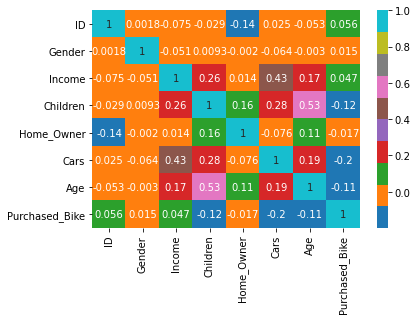

In [104]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, cmap=sns.color_palette( as_cmap=True))
# the corelation between children and age is most.Secondly car and income. that makes sense but when i look at big schema corelation is less.

In [105]:
new_data_copy.corr().abs()["Purchased_Bike"].nlargest(11) #the order highest corelation between Purchased_Bike and another features

Purchased_Bike    1.000000
Cars              0.198774
Children          0.121342
Age               0.105729
ID                0.056357
Income            0.046734
Home_Owner        0.017103
Gender            0.015179
Name: Purchased_Bike, dtype: float64

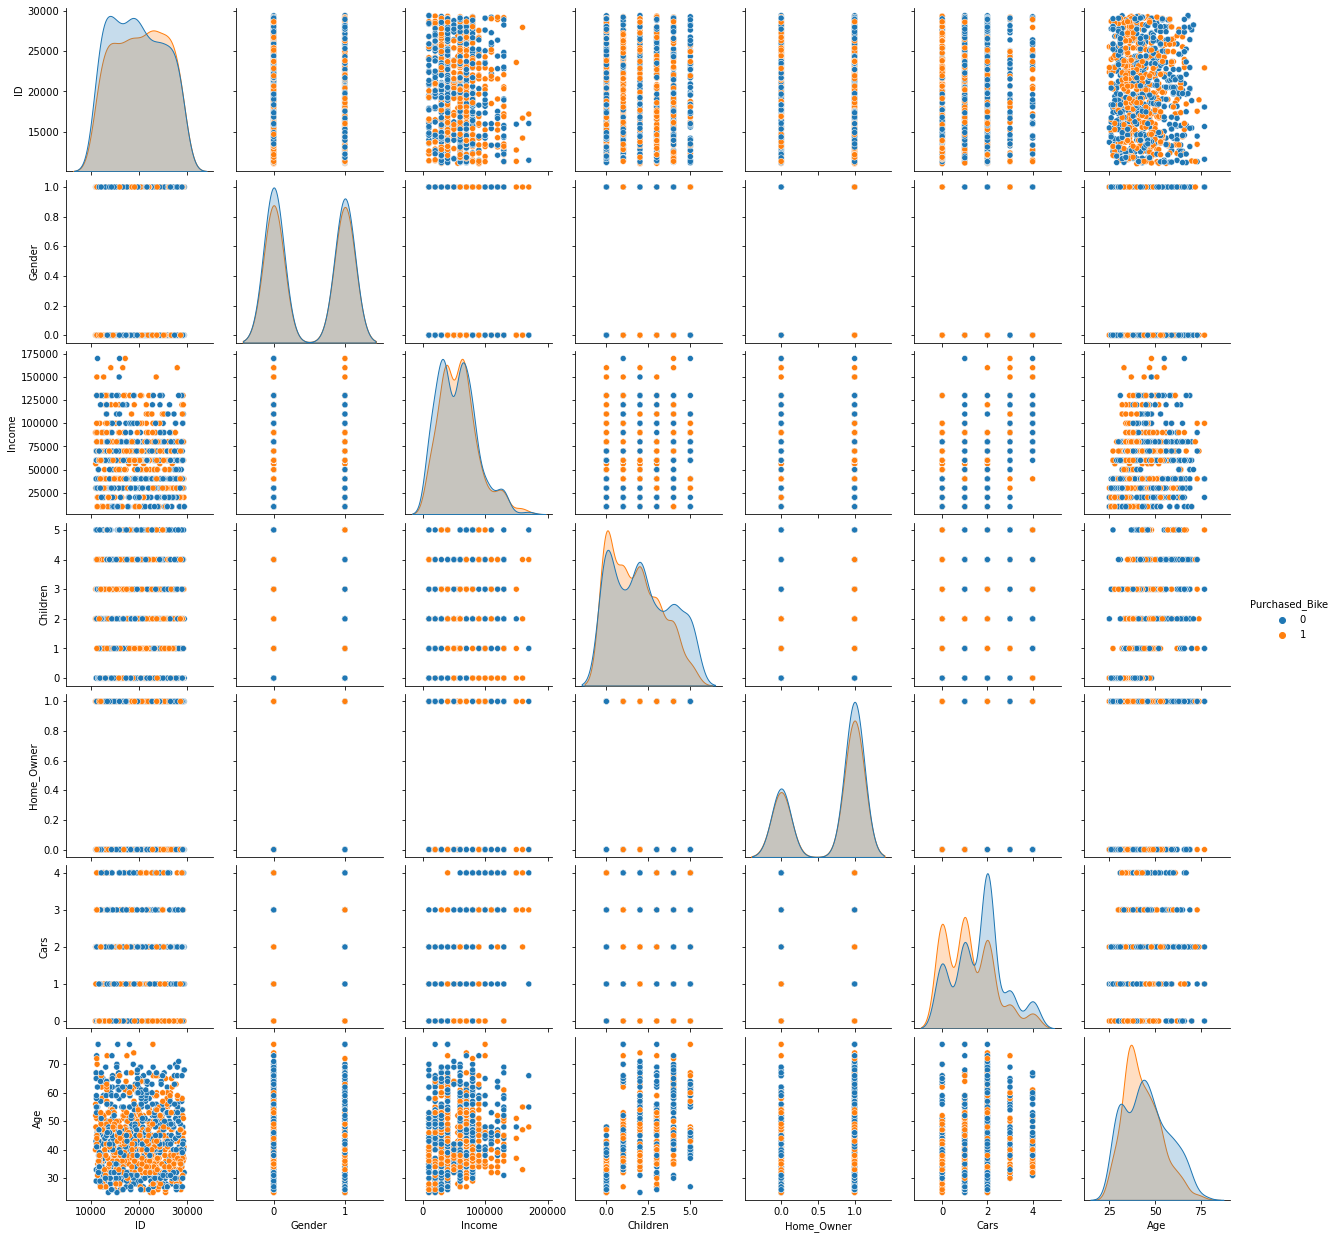

In [106]:
sns.pairplot(data=new_data_copy, hue='Purchased_Bike')# This is showing scatter plot of all features between Purchased_Bike 
#When i look at this matrix there is no corelattion between columns.

<AxesSubplot:xlabel='Cars', ylabel='Children'>

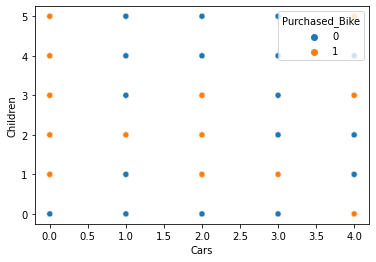

In [107]:
species = list(new_data_copy.groupby('Purchased_Bike'))
sns.scatterplot(data = new_data_copy, x = 'Cars', y = 'Children', hue='Purchased_Bike')

In [108]:
# Aim: is there any relation between gender and Purchased_Bike ?
dd = pd.crosstab(new_data_copy['Purchased_Bike'], new_data_copy['Gender'], margins=True)
dd
#True False Table.

Gender,0,1,All
Purchased_Bike,,,
0,269,250,519
1,242,239,481
All,511,489,1000


In [109]:
e = np.zeros((2,2))
summ= dd.loc['All', 'All']
row = dd.index
col = dd.columns

for i in range(2):
    e[i, 0] = (dd.loc['All', col[0]] * dd.loc[row[i], 'All']) / summ
    e[i, 1] = (dd.loc['All', col[1]] * dd.loc[row[i], 'All']) / summ

real = pd.crosstab(new_data_copy['Purchased_Bike'], new_data_copy['Gender']).to_numpy()
chi_square = np.sum(np.square(real - e)/e)
print(chi_square) 
# for the chi squre table there is no realation between Purchased_Bike and Gender

0.2303909286912178


#### ii) Select (i.e., filter) or create features that make data mining algorithms work.

In [106]:
new_data_copy.head()

,ID,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike
0,12496,Married,1,40000.0,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,42,0
1,24107,Married,0,30000.0,3,Partial College,Clerical,1,1,0-1 Miles,Europe,43,0
2,14177,Married,0,80000.0,5,Partial College,Professional,0,2,2-5 Miles,Europe,60,0
3,24381,Single,0,70000.0,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,1
4,25597,Single,0,30000.0,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,1


In [107]:
s=new_data_copy[new_data_copy['Age']<28]
print("Count of purchased bike or not for YOUNG people ", s["Purchased_Bike"].value_counts())

Count of purchased bike or not for YOUNG people  0    25
1    19
Name: Purchased_Bike, dtype: int64


In [108]:
j=new_data_copy[new_data_copy['Age']>50]
print("Count of purchased bike or not for OLD people ", j["Purchased_Bike"].value_counts())

Count of purchased bike or not for OLD people  0    165
1    109
Name: Purchased_Bike, dtype: int64


#### iii. Apply dimensionality reduction i.e. PCA to your data.

In [110]:
# if there are high corelation between any columns i can remove one of them but in my dataset corellation is very less or there is no exit
#so that i cannot remove any of them. but i can remove ID columns beacuse it haven't benefits and i can search with row number
new_data_copy.drop('ID', inplace=True, axis=1)

In [111]:
sample=new_data_copy.sample(20)#i can test my algorithm in this sample
sample

,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike
608,Married,0,60000.0,3,Partial High School,Skilled Manual,1,2,5-10 Miles,North America,52,1
66,Married,1,40000.0,0,Graduate Degree,Clerical,1,0,0-1 Miles,Europe,37,1
225,Married,0,20000.0,1,Partial College,Manual,1,0,1-2 Miles,Europe,43,0
463,Single,0,20000.0,2,High School,Manual,1,1,0-1 Miles,Europe,40,0
545,Single,0,60000.0,0,Partial College,Skilled Manual,0,2,1-2 Miles,North America,29,0
363,Married,1,40000.0,2,Bachelors,Management,1,2,0-1 Miles,Pacific,66,1
41,Single,1,40000.0,2,Bachelors,Management,1,2,5-10 Miles,Pacific,65,1
95,Single,1,90000.0,5,Partial College,Professional,1,2,10+ Miles,Europe,62,0
519,Married,0,80000.0,5,Bachelors,Management,1,2,1-2 Miles,North America,64,0
99,Married,1,20000.0,3,High School,Manual,1,2,0-1 Miles,Europe,43,0


In [2]:
o=[]
for i in new_data_copy.columns:
    if new_data_copy[i].dtype=='object':
        o.append(i)

Xenc=pd.get_dummies(new_data_copy,columns=o)

NameError: name 'new_data_copy' is not defined

In [3]:
Xenc.head(5)

NameError: name 'Xenc' is not defined

In [113]:
# Stratified Smpling
from sklearn.model_selection import train_test_split

# Stratified Smpling
from sklearn.model_selection import train_test_split

features = Xenc.drop("Purchased_Bike", axis=1)
targets = Xenc[["Purchased_Bike"]]
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets)

# in here i made Stratified sampling and for education split 5 class and it found count of people in this clasess.
print(y_train["Purchased_Bike"].value_counts())


0    389
1    361
Name: Purchased_Bike, dtype: int64


In [114]:
y_test

,Purchased_Bike
193,0
220,1
338,1
752,0
189,1
...,...
326,1
228,0
394,1
272,1


In [115]:
x_train# x is the data for included except Education.

,Gender,Income,Children,Home_Owner,Cars,Age,Marital_Status_Married,Marital_Status_Single,Education_Bachelors,Education_Graduate Degree,...,Occupation_Professional,Occupation_Skilled Manual,Commute_Distance_0-1 Miles,Commute_Distance_1-2 Miles,Commute_Distance_10+ Miles,Commute_Distance_2-5 Miles,Commute_Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific
853,0,60000.0,1,1,0,35,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
99,1,20000.0,3,1,2,43,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
167,0,100000.0,0,1,3,35,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
186,1,30000.0,3,0,2,56,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
497,1,70000.0,1,1,0,34,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1,20000.0,0,0,1,36,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
904,1,60000.0,2,0,0,36,0,1,1,0,...,0,1,1,0,0,0,0,0,1,0
432,1,110000.0,0,1,3,34,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
28,0,70000.0,5,1,2,44,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


## STEP 3 - Choose Data Mining Algorithms & Explain

#### a)  Select the data mining approaches (Regression, Classification or Clustering) that is appropriate for your dataset. Explain in detail.

In this assignment, I decided to make decision tree and logistic regression from classificstion algorithms.Classification Algorithms can be further divided into the Mainly two category;<br>
Linear Models <br>
Non-linear Models <br>
Logistic Regression is a Linear Model.Logistic Regression comes under Supervised Learning. Supervised Learning is when the algorithm learns on a labeled dataset and analyses the training data. These labeled data sets have inputs and expected outputs.
Supervised learning can be further split into classification and regression.A decision tree is a non-linear supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

#### b)Discuss advantages and disadvantages of selected approaches.

####  ==> Decision Tree

Advantages:<br>
Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.<br>
A decision tree does not require normalization of data.<br>
A decision tree does not require scaling of data as well.<br>
Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.<br>
A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.<br>
Disadvantage:<br>
A small change in the data can cause a large change in the structure of the decision tree causing instability.<br>
For a Decision tree sometimes calculation can go far more complex compared to other algorithms.<br>
Decision tree often involves higher time to train the model.<br>
Decision tree training is relatively expensive as the complexity and time has taken are more.<br>
The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.<br>

####  ==> Logistic Regression 
Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1. My dataset result is binary output cause of it's predict to buy bike or not so that i can use this method


Advantages:<br>
Logistic regression is easier to implement, interpret, and very efficient to train.<br>
It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.<br>
It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative).<br>
It is very fast at classifying unknown records.<br>
Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.<br>
Disadvantage:<br>
If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.<br>
It constructs linear boundaries.<br>
The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.<br>
It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set.<br>
Non-linear problems can’t be solved with logistic regression because it has a linear decision surface. Linearly separable data is rarely found in real-world scenarios.<br>

#### c)Select appropriate evaluation methods that you will use in your project and explain them in detail by giving proper formulation.

####  ==> Decision Tree

Entropy, controls how a Decision Tree decides to split the data. It affects how a Decision Tree draws its boundaries.

formula of Enrropy= ∑-p log2(p)<br>
H(s)= -probability of log2(p+)-probability of log2(p-)

In [116]:
new_data_copy["Purchased_Bike"].value_counts()

0    519
1    481
Name: Purchased_Bike, dtype: int64

in my data set there are 519 no 481 yes value so that i can calculate entropy like this;<br>
Entropy(Purchased_Bike)=Entropy(481,519)<br>
Entropy(0.48,0.52)<br>
=-(0.48log2(0.48)-(0.52log2(0.52))<br>
=-(0,504+0,488)<br>
=-0,992<br>

Entropy for multiple atrributes is ; E(T,X)=∑p(c)E(c)

In [117]:
ent = pd.crosstab(new_data_copy['Education'], new_data_copy['Purchased_Bike'], margins=True)
ent

Purchased_Bike,0,1,All
Education,,,
Bachelors,137,169,306
Graduate Degree,80,94,174
High School,100,79,179
Partial College,146,119,265
Partial High School,56,20,76
All,519,481,1000


E(Purchased_Bike,Education)=<br>
P(Bachelors)*E(169,137)+<br>
P(Graduate Degree)*E(94,80)+<br>
P(High School)*E(79,100)+<br>
P(Partial College)*E(119,146)+<br>
P(Partial High School)*E(20,56)<br>=
(0,306)*(-169/306*log2(169/306)-(137/306)*log2(137/306))=0,306*0,99+<br>
(0,174)*(0,99)+<br>
(0,179)*(0,99)+<br>
(0,265)*(0,99)+<br>
(0,076)*(0,83)<br>
=0,978<br>

information gain<br>
Information gain or IG is a statistical property that measures how well a given attribute separates the training examples according to their target classification.

Information Gain(T,x)=Entropy(T)-Entropy(t,x)

IG(Purchased_Bike,Education)=E(Purchased_Bike)-E(Purchased_Bike,Education)<br>
=0,992-0,978=0,014<br>

You should do this gain calculation for all these attributes after that the most high value is the root of tree in decision tree after node is the second higest attribute.

####  ==> Logistic Regression 
Logistic regression is a statistical model that uses Logistic function to model the conditional probability.

P(Y=1|X) or P(Y=0|X)<br>
This is read as the conditional probability of Y=1, given X or conditional probability of Y=0, given X.

logistic regression is buy bike or not it's depending for education<br>
P(default=yes|education)+P(default=no|education)=1

Odds : The probability of success or occurrence of odds is “P”, failure or
It is the “1-P” ratio to the probability of not being seen. Odds value (0,+∞)
get values<br>
Odds=P/(1-P)

In [118]:
ent = pd.crosstab(new_data_copy['Gender'], new_data_copy['Purchased_Bike'], margins=True)
ent

Purchased_Bike,0,1,All
Gender,,,
0,269,242,511
1,250,239,489
All,519,481,1000


posibility of male's buy bike odd's;<br>
269/242=1,11<br>
posibility of female's buy bike odd's;<br>
250/239=1,046<br>
Odds ratio=1,11/ 1,046 = 1,06<br>

men are 1.06 times more likely to buy a bike than women<br>
lojit(p)=In(p/1-p)=In(OR)<br>
Odds ratio asimetriktir.<br>
Doğal logaritması alınarak simetrik hale dönüştürülür.<br>

## STEP 4 - Algorithms, Implementation and Performance Comparison

#### a)  Implement your selected algorithm.

####  ==> Decision Tree

In [119]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [120]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

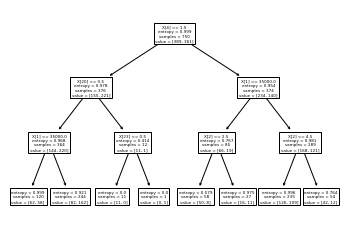

In [121]:
from sklearn import tree
tree.plot_tree(model);

In [130]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=3)
dtree.fit(x_train, y_train)
predicitions = dtree.predict(x_test)
acc = accuracy_score(y_test, predicitions)
acc

0.62

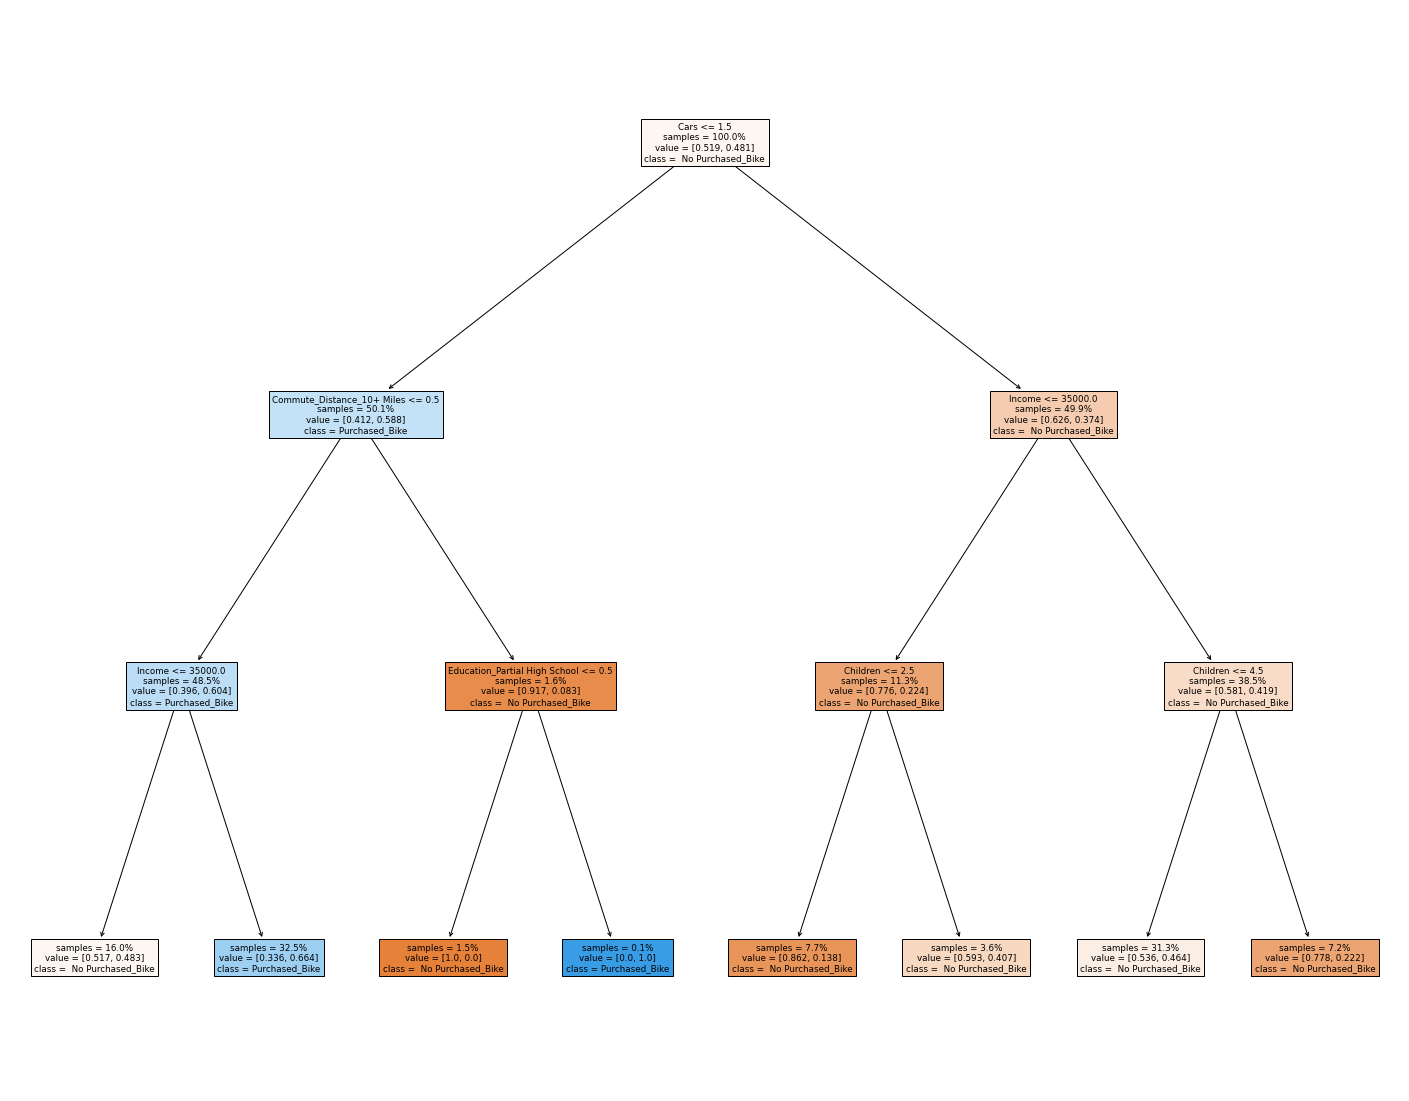

In [131]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = x_train.columns,
            class_names=[' No Purchased_Bike', 'Purchased_Bike'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test1.png')

In [132]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=3)
dtree.fit(x_train, y_train)
predicitions = dtree.predict(x_test)
acc = accuracy_score(y_test, predicitions)
acc

0.648

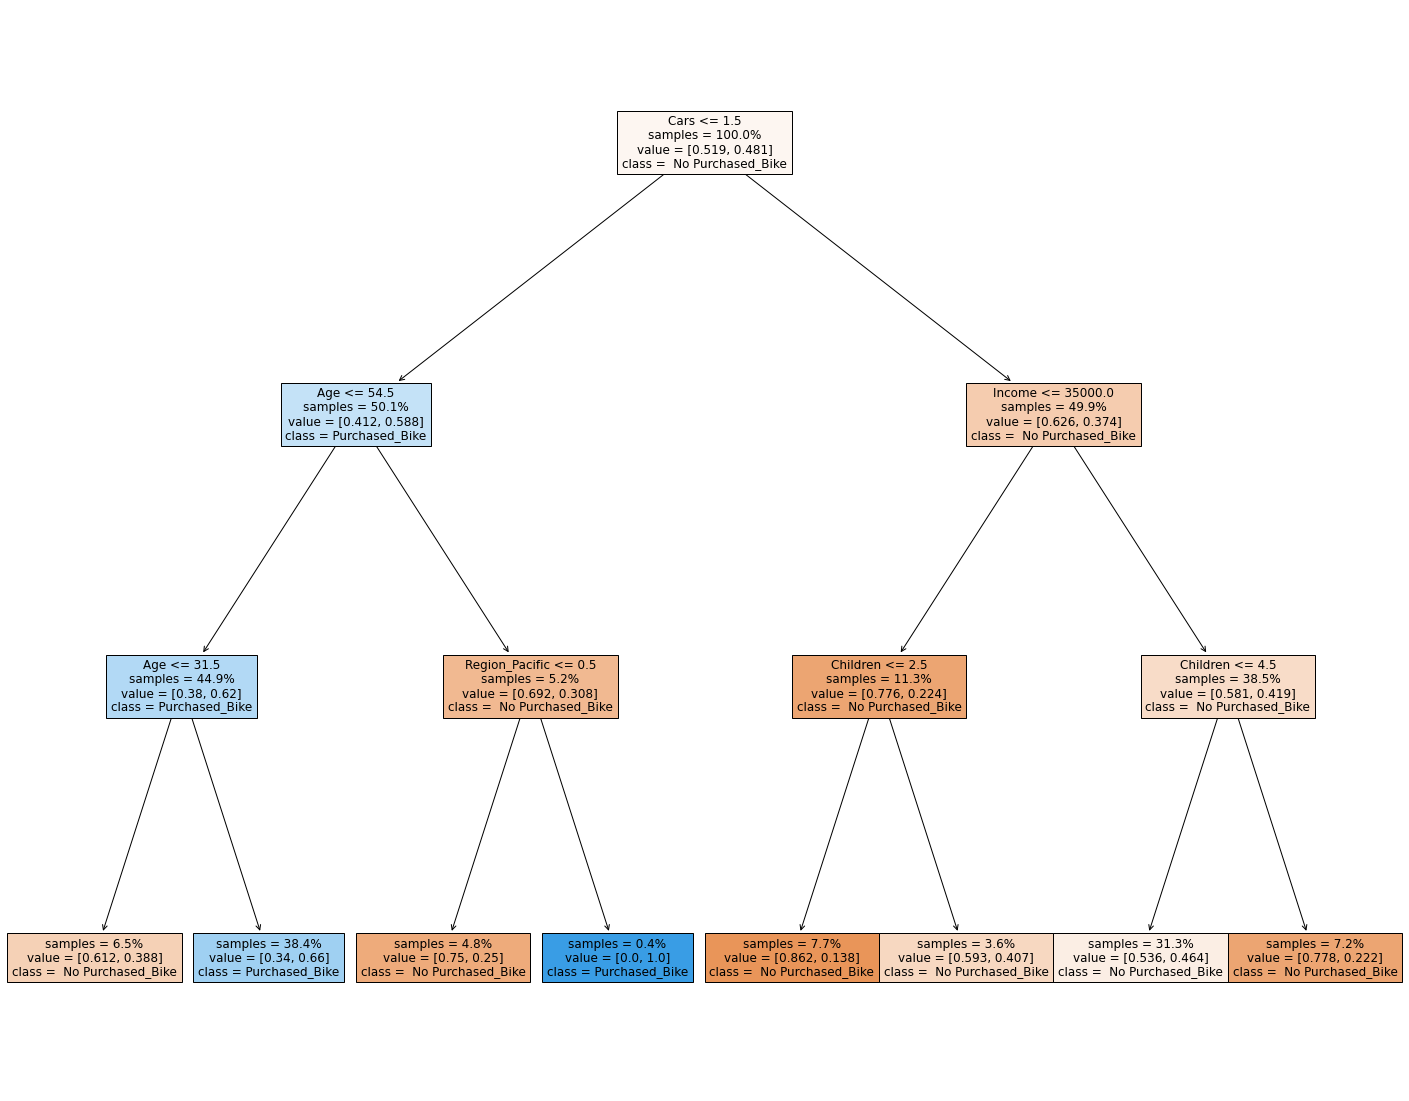

In [133]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = x_train.columns,
            class_names=[' No Purchased_Bike', 'Purchased_Bike'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test2.png')

In [134]:

dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)
predicitions = dtree.predict(x_test)
acc = accuracy_score(y_test, predicitions)
acc

0.648

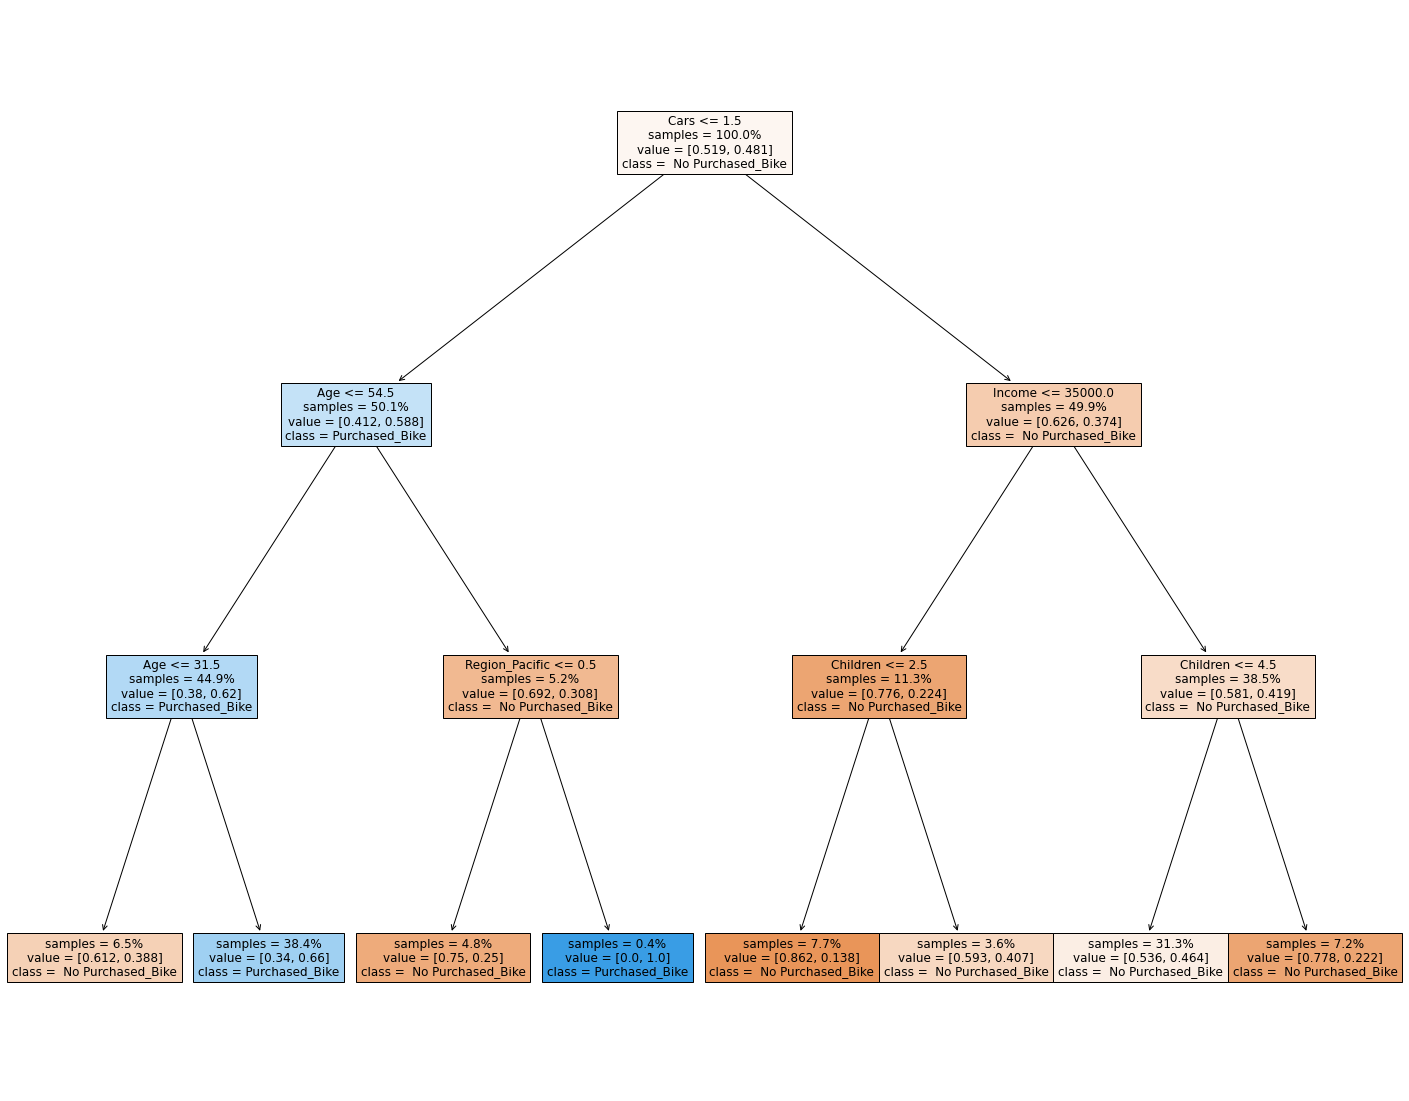

In [135]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = x_train.columns,
            class_names=[' No Purchased_Bike', 'Purchased_Bike'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test3.png')

In [136]:
dtree = DecisionTreeClassifier(criterion="gini",min_samples_leaf=2)
dtree.fit(x_train, y_train)
predicitions = dtree.predict(x_test)
acc = accuracy_score(y_test, predicitions)
acc

0.628

In [137]:
dtree = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=2)
dtree.fit(x_train, y_train)
predicitions = dtree.predict(x_test)
acc = accuracy_score(y_test, predicitions)
acc

0.68

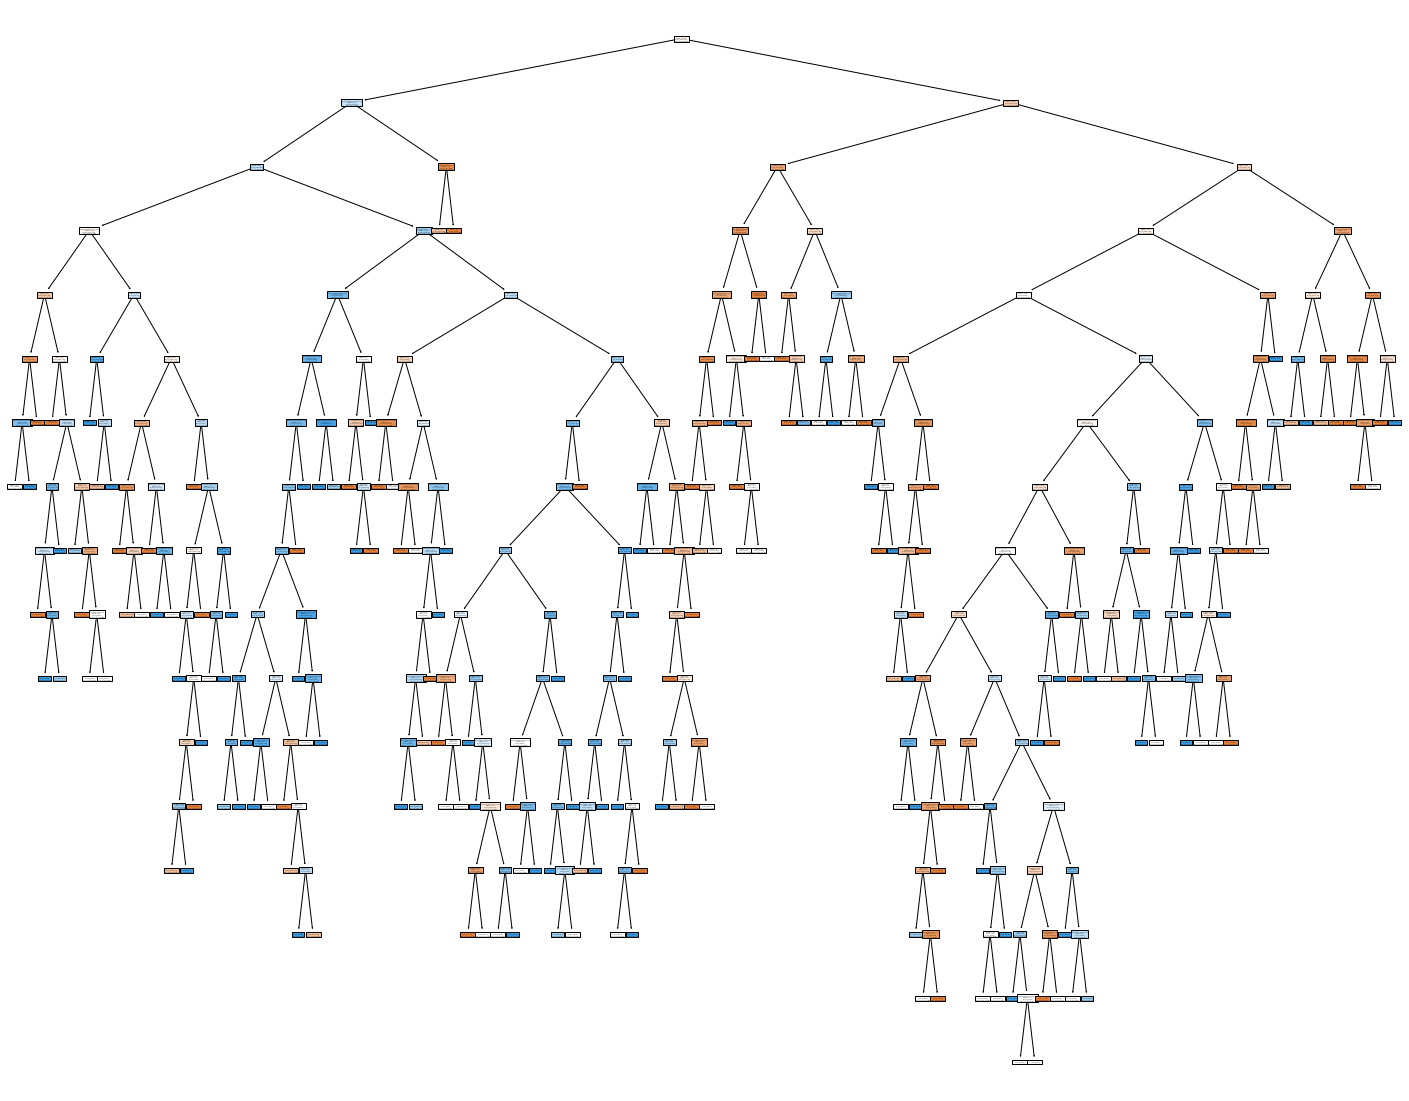

In [138]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = x_train.columns,
            class_names=[' No Purchased_Bike', 'Purchased_Bike'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test4.png')

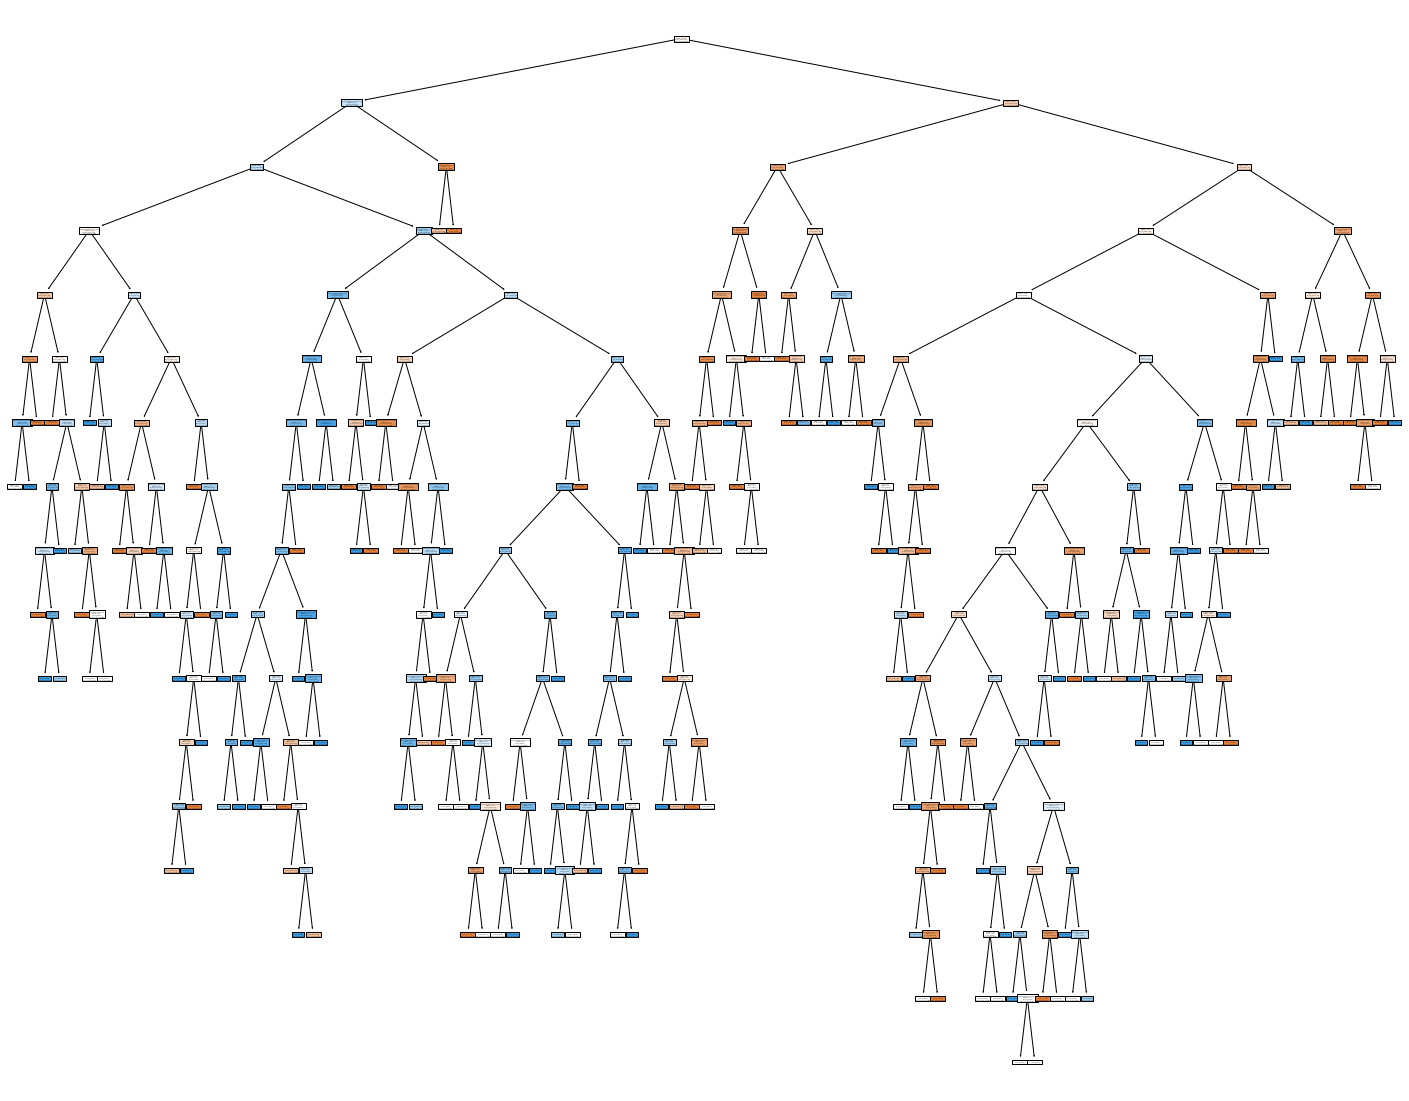

In [139]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = x_train.columns,
            class_names=[' No Purchased_Bike', 'Purchased_Bike'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test5.png')

In [140]:
dtree.fit(x_train,y_train)
dtree.score(x_test,y_test)

0.688

####  ==> Logistic Regression 

In [141]:
from sklearn.linear_model import LogisticRegression 

In [142]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='sag',random_state=0)
classifier.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(random_state=0, solver='sag')

In [143]:
predicitionsL = classifier.predict(x_test)
accL = accuracy_score(y_test, predicitionsL)
accL

0.52

In [144]:
classifier = LogisticRegression(solver='newton-cg',random_state=0)
classifier.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line sea

LogisticRegression(random_state=0, solver='newton-cg')

In [145]:
predicitionsL = classifier.predict(x_test)
accL = accuracy_score(y_test, predicitionsL)
accL

0.688

In [146]:
classifier = LogisticRegression(solver='lbfgs',random_state=3)
classifier.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=3)

In [147]:
predicitionsL = classifier.predict(x_test)
accL = accuracy_score(y_test, predicitionsL)
accL

0.668

In [148]:
print('Acc:{:.3f}'.format(classifier.score(x_test, y_test)))

Acc:0.668


In [149]:
classifier.score(x_test, y_test)

0.668

In [150]:
from sklearn.metrics import classification_report
classification_report(y_test, predicitionsL)

'              precision    recall  f1-score   support\n\n           0       0.69      0.67      0.68       130\n           1       0.65      0.67      0.66       120\n\n    accuracy                           0.67       250\n   macro avg       0.67      0.67      0.67       250\nweighted avg       0.67      0.67      0.67       250\n'

#### b)   Which hyperparameters need to be tuned? Explain. Find the best parameters for each approach.


==>Decision Tree<br>


criterion : Decides the measure of the quality of a split based on criteria like “gini” for the Gini impurity and “entropy” for the information gain.<br>
max_depth : The maximum depth of the tree, the more depth of tree generally it overfits the data.<br>

max_leaf_nodes : Grows the tree with a specified number of leaf nodes based on reduction in impurity.<br>

min_samples_split : The minimum number of samples that are required to split an internal node.<br>

min_samples_leaf : The minimum number of samples that are required to be at a leaf node of the tree<br>

//As far as I have learned from my own experience above, entering these two parameters increases my success because the branches of the tree can grow as long as they want, even if it is a useless tree, the prediction feature is high.


 ==> Logistic Regression 

Solver :is the algorithm to use in the optimization problem. The choices are {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’;<br>

lbfgs relatively performs well compared to other methods and it saves a lot of memory, however, sometimes it may have issues with convergence.<br>

sag faster than other solvers for large datasets, when both the number of samples and the number of features are large.<br>

saga the solver of choice for sparse multinomial logistic regression and it’s also suitable for very large datasets.<br>
newton-cg computationally expensive because of the Hessian Matrix.<br>

liblinearrecommended when you have a high dimension dataset - solving large-scale classification problems.<br>
Penalty (or regularization): intends to reduce model generalization error, and is meant to disincentivize and regulate overfitting.<br>

C (or regularization strength): must be a positive float. Regularization strength works with the penalty to regulate overfitting. Smaller values specify stronger regularization and high value tells the model to give high weight to the training data.<br>

//as i try the most succesfull model in here  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'} like this.


#### c)Compare the algorithms with tuned hyperparameter based on the selected evaluation technique, numerically and visually.

In [151]:
# i can compare two algorithms acc
dtree = DecisionTreeClassifier(criterion="gini",max_depth=15)
dtree.fit(x_train, y_train)
predicitions = dtree.predict(x_test)
acc = accuracy_score(y_test, predicitions)
acc

0.692

In [152]:
classifier = LogisticRegression(solver='newton-cg',random_state=0)

classifier.fit(x_train, y_train)
predicitionsL = classifier.predict(x_test)
accL = accuracy_score(y_test, predicitionsL)
accL

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line sea

0.688

In [153]:

classifier.fit(x_train, y_train)

predicitions = classifier.predict(x_test)
print(classification_report(y_test,predicitions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line sea

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       130
           1       0.67      0.70      0.68       120

    accuracy                           0.69       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.69      0.69      0.69       250



C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [154]:

dtree.fit(x_train, y_train)

predicitions = dtree.predict(x_test)
print(classification_report(y_test,predicitions))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       130
           1       0.70      0.62      0.66       120

    accuracy                           0.69       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.69      0.69      0.69       250



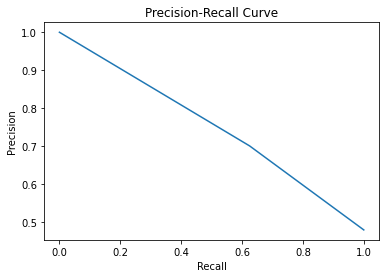

In [155]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, predicitions )


fig, ax = plt.subplots() 
ax.plot(recall, precision) 


ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

In [157]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicitionsL,normalize='true')

array([[0.67692308, 0.32307692],
       [0.3       , 0.7       ]])

In [158]:
metrics.confusion_matrix(y_test, predicitions)

array([[98, 32],
       [45, 75]], dtype=int64)

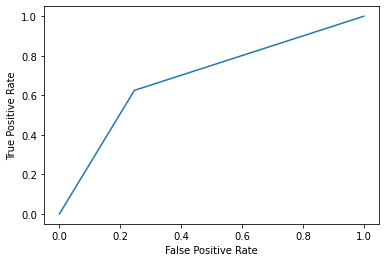

In [159]:


fpr, tpr, _ = metrics.roc_curve(y_test,  predicitions)

#ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

68.8


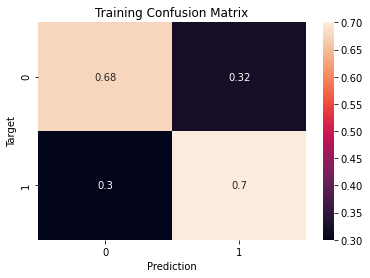

In [160]:
pred= classifier.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*(100))
cf=confusion_matrix(y_test,pred,normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('Training'));

68.8


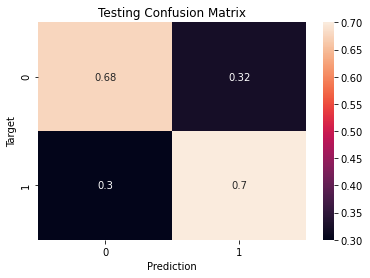

In [161]:
pred= classifier.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*(100))
cf=confusion_matrix(y_test,pred,normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('Testing'));

69.19999999999999


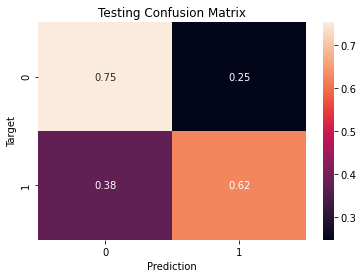

In [163]:
pred= dtree.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*(100))
cf=confusion_matrix(y_test,pred,normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('Testing'));

If I compare it as a method, the regression seems to be faster and more successful.

#### d)  Which algorithm performs the best? Can you explain why?

When I examine the success rates, especially after the improvement, the decision tree is an algorithm that can predict better, but as the number of data increases, it does not make sense to continue with the decision tree because there is not much relationship in my dataset, so the success of my dataset is high, but it has a lot of depth, which can harm speed and memory management. .

## STEP 5 - Further Performance Improvement 

#### a) Can you propose any other improvement techniques?

==> Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier
best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6,7,8,9]:
        for min_samples_leaf in [5, 10, 20, 30,40,50,60,70]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(x_train, y_train)
            predicitions = dtree.predict(x_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                print(best_params)
                best_acc = acc
best_acc

criterion: gini, max_depth: 2, min_samples_leaf: 5
criterion: gini, max_depth: 3, min_samples_leaf: 5
criterion: gini, max_depth: 3, min_samples_leaf: 50
criterion: gini, max_depth: 4, min_samples_leaf: 5
criterion: gini, max_depth: 5, min_samples_leaf: 10
criterion: gini, max_depth: 6, min_samples_leaf: 10


0.724

==> Logistic Regression

In [165]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_test, y_test)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.641333 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.628000 (0.100744) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.528000 (0.060575) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.634667 (0.096738) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.633333 (0.102285) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.528000 (0.060575) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.636000 (0.093152) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.638667 (0.109048) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.526667 (0.073817) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.636000 (0.102943) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.636000 (0.117007) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.522667 (0.070755) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.641333 (0.119770) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.593333 (0.120481) wit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### a) Give objective comments on your findings. Did you achieve your goal in the project? Explain your difficulties.

First of all, I am not very satisfied with my dataset that I chose. Although it has a very suitable subject for the decision tree, I could not reduce any of the 13 columns except id because there is very little correlation between them, so I have a crowded data set. I realized that there is not much difference for at least this dataset. In the homework I did, I aimed to increase my success much more with the improvement process, but even by choosing the best hyperparameters, my success did not go above 0.6-odd. I'm guessing it's due to the relationship of the attributes.